In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
directory="dataset/train/"
classses=os.listdir(directory)

In [3]:
classses

['Combination', 'Dry', 'Normal', 'Oily']

In [4]:
import os
import cv2
image_size=224
data1=[]#empty list
for category in classses:
    path = os.path.join(directory, category)
    print(path)
    label = classses.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
#         print("img path")
#         print(img_path)
        arr = cv2.imread(img_path)#Reading Images
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
        data1.append([new_arr, label])

dataset/train/Combination
dataset/train/Dry
dataset/train/Normal
dataset/train/Oily


In [5]:
import random
random.shuffle(data1)

In [6]:
len(data1)

210

In [7]:
x=[]#independent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [8]:
x=np.array(x)
y=np.array(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [10]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(classses), activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [11]:
progess = model.fit(x=X_train,y=y_train,epochs=7,validation_data= (X_test, y_test), batch_size=32)

Epoch 1/7
6/6 [==============================] - 37s 6s/step - loss: 1.6285 - accuracy: 0.3095 - val_loss: 1.6466 - val_accuracy: 0.2619
Epoch 2/7
6/6 [==============================] - 36s 6s/step - loss: 0.9611 - accuracy: 0.6250 - val_loss: 1.8254 - val_accuracy: 0.2619
Epoch 3/7
6/6 [==============================] - 36s 6s/step - loss: 0.5728 - accuracy: 0.7857 - val_loss: 1.5995 - val_accuracy: 0.1429
Epoch 4/7
6/6 [==============================] - 36s 6s/step - loss: 0.2547 - accuracy: 0.9226 - val_loss: 1.6300 - val_accuracy: 0.3810
Epoch 5/7
6/6 [==============================] - 36s 6s/step - loss: 0.1625 - accuracy: 0.9524 - val_loss: 1.5794 - val_accuracy: 0.3333
Epoch 6/7
6/6 [==============================] - 36s 6s/step - loss: 0.1517 - accuracy: 0.9583 - val_loss: 1.6598 - val_accuracy: 0.2143
Epoch 7/7
6/6 [==============================] - 36s 6s/step - loss: 0.0556 - accuracy: 0.9881 - val_loss: 1.7781 - val_accuracy: 0.3571


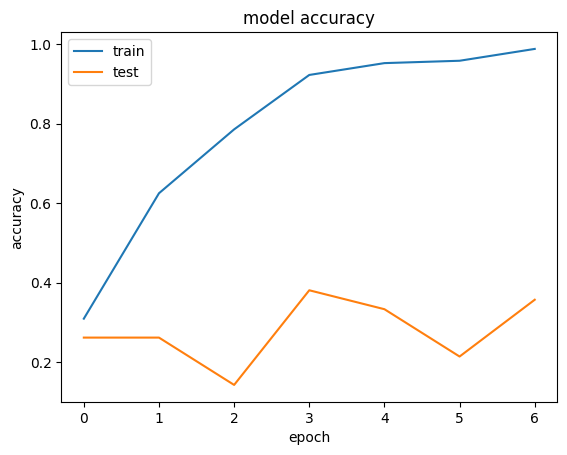

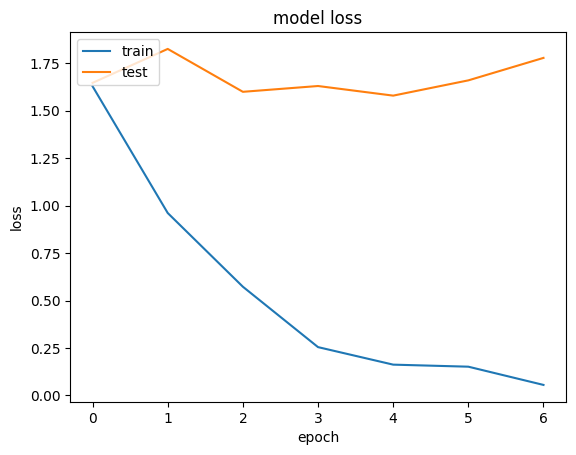

In [12]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [14]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

              precision    recall  f1-score   support

 Combination       0.57      0.50      0.53         8
         Dry       0.00      0.00      0.00        12
      Normal       0.38      0.25      0.30        12
        Oily       0.30      0.80      0.43        10

    accuracy                           0.36        42
   macro avg       0.31      0.39      0.32        42
weighted avg       0.29      0.36      0.29        42



C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

<AxesSubplot:>

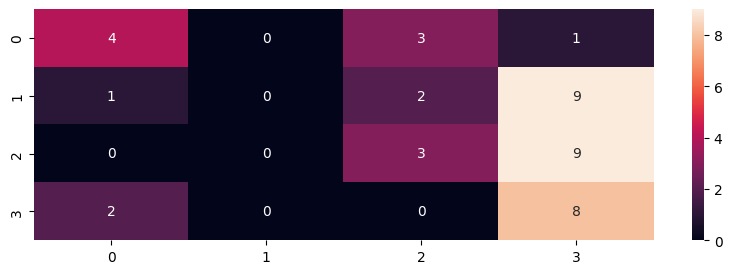

In [16]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [17]:
model.save("savemodel/inception_classifier.hp5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: savemodel/inception_classifier.hp5\assets


# Resnet-50

In [18]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
res_model = Sequential()
res_model.add(base_model)
res_model.add(Flatten(input_shape=base_model.output_shape[1:]))
res_model.add(Dense(256, activation='relu'))
res_model.add(Dropout(0.2))
res_model.add(Dense(128, activation='relu'))
res_model.add(Dropout(0.2))
res_model.add(Dense(len(classses), activation='softmax'))
res_model = Model(inputs=res_model.input, outputs=res_model.output)
res_model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [19]:
progess1 = res_model.fit(x=X_train,y=y_train,epochs=7,validation_data= (X_test, y_test), batch_size=128)

Epoch 1/7
2/2 [==============================] - 28s 14s/step - loss: 2.4321 - accuracy: 0.2619 - val_loss: 1.2919 - val_accuracy: 0.6429
Epoch 2/7
2/2 [==============================] - 24s 12s/step - loss: 0.4011 - accuracy: 0.8631 - val_loss: 1.8345 - val_accuracy: 0.4762
Epoch 3/7
2/2 [==============================] - 25s 13s/step - loss: 0.3162 - accuracy: 0.8810 - val_loss: 1.5703 - val_accuracy: 0.4762
Epoch 4/7
2/2 [==============================] - 25s 12s/step - loss: 0.0858 - accuracy: 0.9702 - val_loss: 1.2287 - val_accuracy: 0.5238
Epoch 5/7
2/2 [==============================] - 25s 12s/step - loss: 0.0740 - accuracy: 0.9643 - val_loss: 0.9245 - val_accuracy: 0.6667
Epoch 6/7
2/2 [==============================] - 25s 12s/step - loss: 0.0653 - accuracy: 0.9881 - val_loss: 0.8321 - val_accuracy: 0.7381
Epoch 7/7
2/2 [==============================] - 24s 12s/step - loss: 0.0293 - accuracy: 0.9940 - val_loss: 0.9017 - val_accuracy: 0.7143


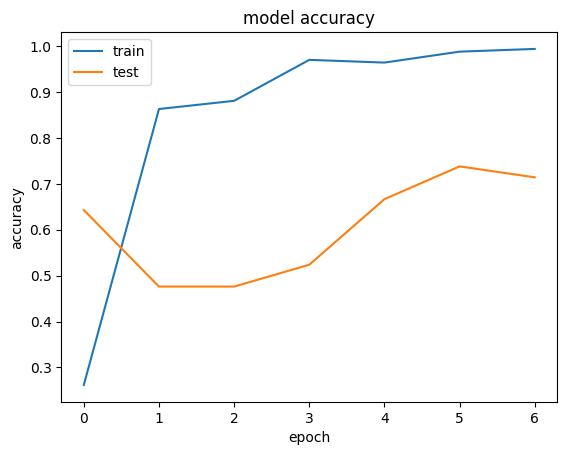

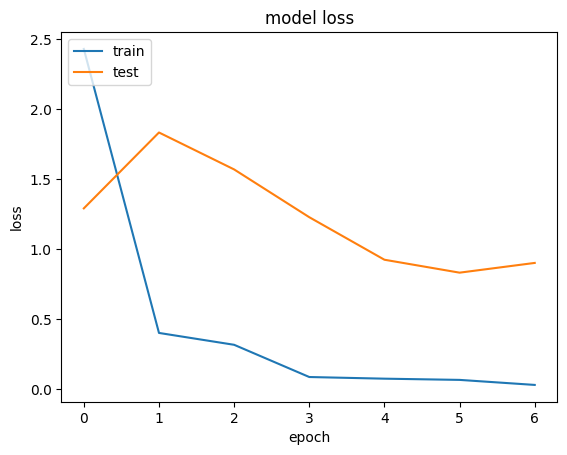

In [20]:
plt.plot(progess1.history['accuracy'])
plt.plot(progess1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess1.history['loss'])
plt.plot(progess1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred1 = res_model.predict(X_test)

In [22]:
y_pred_new1=[]
for i in y_pred1:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new1.append(y)
    #break

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new1, target_names=classses))

              precision    recall  f1-score   support

 Combination       0.80      0.50      0.62         8
         Dry       0.50      0.42      0.45        12
      Normal       0.92      0.92      0.92        12
        Oily       0.67      1.00      0.80        10

    accuracy                           0.71        42
   macro avg       0.72      0.71      0.70        42
weighted avg       0.72      0.71      0.70        42



<AxesSubplot:>

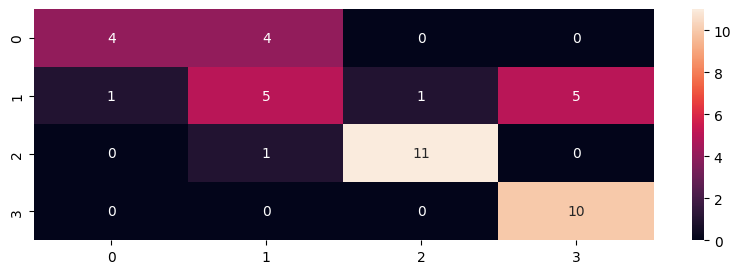

In [24]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new1)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [25]:

res_model.save("savemodel/resnet_classifier.hp5")

INFO:tensorflow:Assets written to: savemodel/resnet_classifier.hp5\assets


# EfficientB7

In [31]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


base_model = applications.EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224,224,3))

model_eff = Sequential()
#data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model_eff.add(base_model)
model_eff.add(Flatten(input_shape=base_model.output_shape[1:]))
model_eff.add(Dense(512, activation='relu'))
model_eff.add(Dense(256, activation='relu'))
model_eff.add(Dense(128, activation='relu'))
model_eff.add(Dense(64, activation='relu'))
model_eff.add(Dense(len(classses), activation='softmax'))

model_eff = Model(inputs=model_eff.input, outputs=model_eff.output)
model_eff.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
progess3 = model_eff.fit(x=X_train,y=y_train,epochs=7,validation_data= (X_test, y_test), batch_size=32)

Epoch 1/7
6/6 [==============================] - 1445s 241s/step - loss: 1.2545 - accuracy: 0.4107 - val_loss: 2.5503 - val_accuracy: 0.2381
Epoch 2/7


In [ ]:
plt.plot(progess3.history['accuracy'])
plt.plot(progess3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess1.history['loss'])
plt.plot(progess1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred1 = model_eff.predict(X_test)

In [ ]:
y_pred_new1=[]
for i in y_pred1:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new1.append(y)
    #break

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new1, target_names=classses))

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new1)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [ ]:
model_eff.save("savemodel/effcient_model.hp5")